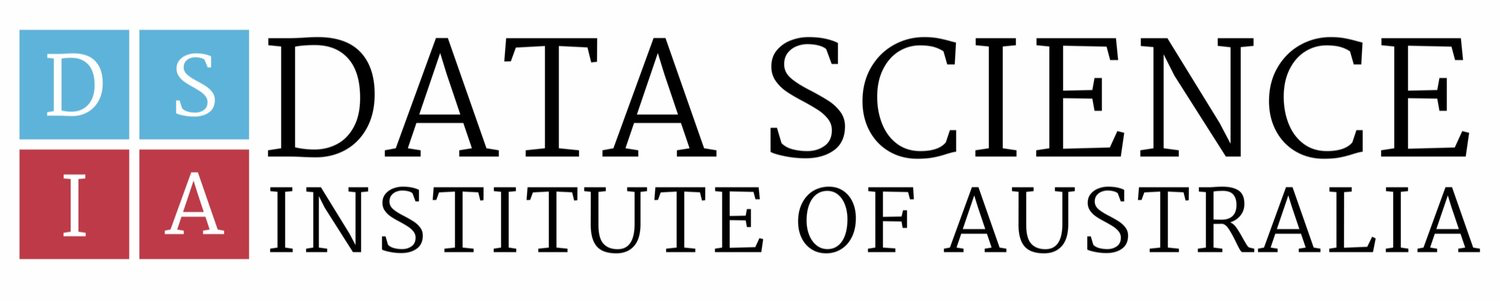

# Data Science and AI
## Lab 3.2.2: Statistical Proof

### Part 1: Student's t-Test
The _t-test_ is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means
Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in this [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data
- [Original data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data)
- [Data dictionary](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [8]:
sns.set(rc={'figure.figsize': (10, 6)})
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

In [9]:
boston = load_boston()
data = pd.DataFrame(
    boston.data,
    columns=boston.feature_names)
data['MEDV'] = boston.target

- Data information
    - shape
    - head

In [10]:
data.shape

(506, 14)

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Plot Histogram of `RM`

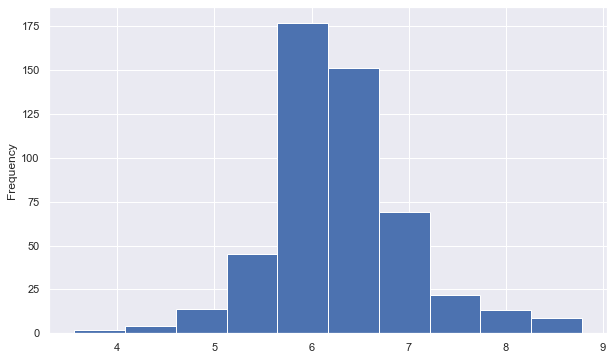

In [12]:
RM = data['RM']
RM.plot(kind='hist')
plt.show()

### 2. Plot Histogram of `MEDV`

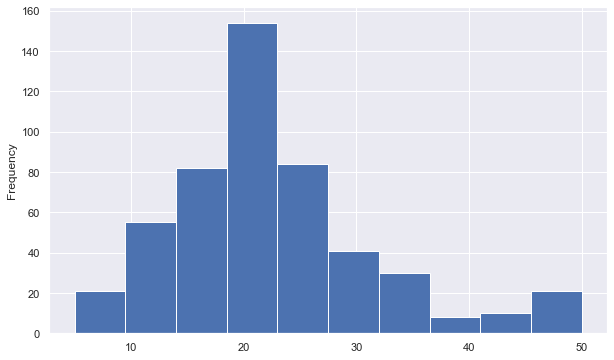

In [13]:
MEDV = data['MEDV']
MEDV.plot(kind='hist')
plt.show()

### 3.A Draw Scatter Plot of `RM` & `MEDV`

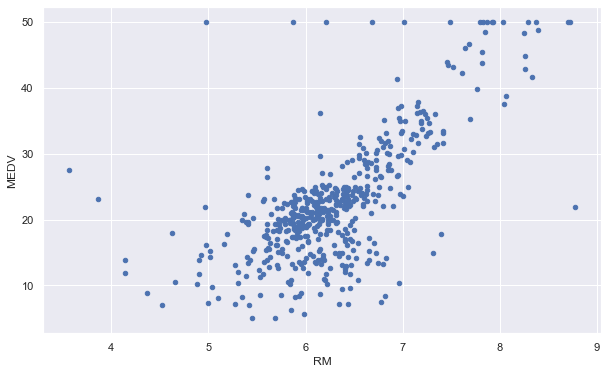

In [14]:
data[['RM', 'MEDV']].plot(kind='scatter', x='RM', y='MEDV', c='b')
plt.show()

### 3.B Is there any trend? State your observation.

**Answer**: We'll be using following steps:
- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

### 4.A Define Hypothesis
Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**Answer**:
- **H0**: `Large House` prices are the same as `Small House` prices
- **H1**: `Large House` prices are higher than `Small House` prices

OR

- **H0**: $\mu_{LH} = \mu_{SH} \Rightarrow \mu_{LH} - \mu_{SH} = 0$
- **H1**: $\mu_{LH} > \mu_{SH} \Rightarrow \mu_{LH} - \mu_{SH} > 0$

**Note**: Because it uses `>`it is a `one-tail` test.

### 4.B Draw the curve to guide the analysis
Draw the curve on a paper or create a chart to guide the analysis.

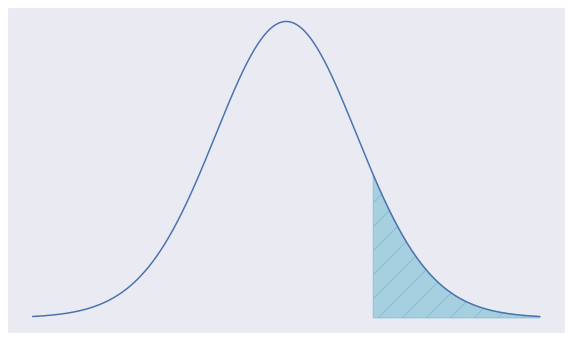

In [15]:
# `fake` number just for the plot
t_stat = 1.2
df = 30

# plot a `t` distribution
x = np.linspace(-3.5, 3.5, int((3.5 - (-3.5)) / 0.01 + 1))
y = stats.t.pdf(x, df)
plt.plot(x, y, 'b')

# plot the area of interest
x_q = np.linspace(t_stat, 3.5, int((3.5 - t_stat) / 0.01 + 1))
y_q = stats.t.pdf(x_q, df)
plt.fill_between(x_q, y_q, color='c', hatch='/', alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.show()

### 5. Set alpha (Let alpha = 0.05)
First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [16]:
alpha = 0.05

### 6.A Set Data
Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have 6 or less rooms.

Take samples of 100 house in each dataset.

In [17]:
# set the seed for randomisation
np.random.seed(65)
# sample size
n1 = 100
n2 = 100
# filter
filter = data['RM'] > 6
# split the dataset and collect the samples
medv_over_6 = data[filter]['MEDV'].sample(n1)
medv_under_6 = data[~filter]['MEDV'].sample(n2)

### 6.B [BONUS] Build histogram for both `Large House` & `Small House`

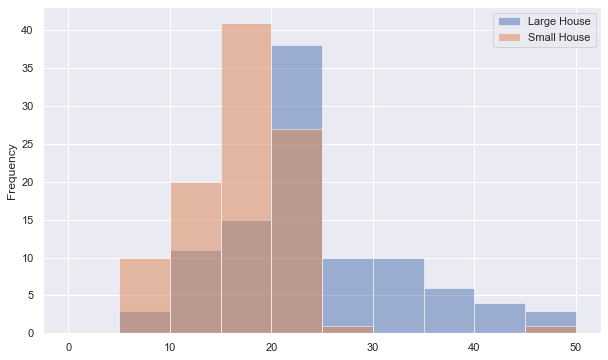

In [18]:
# create a common binning
bins = [5 * i for i in range(11)]

# plot data
plt.hist(medv_over_6, bins=bins, label='Large House', alpha=0.5)
plt.hist(medv_under_6, bins=bins, label='Small House', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

### 7. Calculate Mean and Variance
Calculate the mean and variance for both samples.

In [19]:
# mean
mean_medv_over_6 = medv_over_6.mean()
print('Mean of over 6  = %.4f' % mean_medv_over_6)
mean_medv_under_6 = medv_under_6.mean()
print('Mean of under 6 = %.4f' % mean_medv_under_6)

Mean of over 6  = 24.2090
Mean of under 6 = 17.3640


In [20]:
# variance
var_medv_over_6 = medv_over_6.var()
print('Variance of over 6  = %.4f' % var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print('Variance of under 6 = %.4f' % var_medv_under_6)

Variance of over 6  = 78.2184
Variance of under 6 = 33.8369


### 8. Calculate Standard Error
Because we are dealing with two samples we need to compute the joint standard deviation.

Here $s_p$ is the pooled standard deviation for $n = n1 = n2$ and $s_1^2$ and $s_2^2$ are the unbiased estimators of the variances of the two samples.

$$
s_p^2 = {(n_1 - 1) s_1^2 + (n_2 - 1) s_ 2^2 \over n_1 + n_2 - 2} \\
S_{err} = S_p \sqrt{{1 \over n_1 } + {1 \over n_2}}
$$

### 8. Calculate Standard Error
$$
S_{err} = \sqrt{{s_1^2 \over n_1 } + {s_2^2 \over n_2}}
$$

In [21]:
# standard deviation
std_medv_over_6 = medv_over_6.std()
print('Standard deviation of over 6  = %.4f' % std_medv_over_6)
std_medv_under_6 = medv_under_6.std()
print('Standard deviation of under 6 = %.4f' % std_medv_under_6)

Standard deviation of over 6  = 8.8441
Standard deviation of under 6 = 5.8169


In [22]:
# # pooled standard deviation
# s_p = np.sqrt(((n - 1) * var_medv_over_6**2 + (n - 1) * var_medv_under_6**2) / \
#               (2 * n - 2))
# print('Pooled Standard Deviation = %.4f' % s_p)

In [23]:
# standard error
se = np.sqrt((var_medv_over_6 / n1) + (var_medv_under_6 / n2))
# can also be calculate as below, remember var = std^2 OR sqrt(var) = std
# se = np.sqrt((std_medv_over_6**2 / n) + (std_medv_under_6**2 / n))
print('Standard Error = %.4f' % se)

Standard Error = 1.0586


In [37]:
# find minimum/maximum x from both distributions
min_medv_over_6 = mean_medv_over_6 - 3.5 * std_medv_over_6
min_medv_under_6 = mean_medv_under_6 - 3.5 * std_medv_under_6
max_medv_over_6 = mean_medv_over_6 + 3.5 * std_medv_over_6
max_medv_under_6 = mean_medv_under_6 + 3.5 * std_medv_under_6
low_x = min(min_medv_over_6, min_medv_under_6)
high_x = max(max_medv_over_6, max_medv_under_6)

# create the range for x
x = np.linspace(
    low_x,
    high_x,
    int((high_x - low_x) / 0.1 + 1))

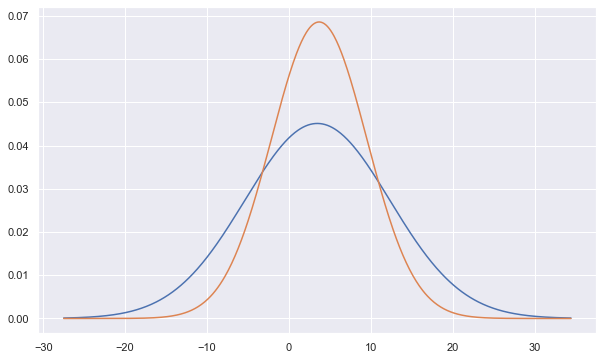

In [38]:
plt.plot(x, stats.norm.pdf(x, mean_medv_over_6, std_medv_over_6))
plt.plot(x, stats.norm.pdf(x, mean_medv_under_6, std_medv_under_6))
plt.show()

0.8031818019536604 1.5771672290011403


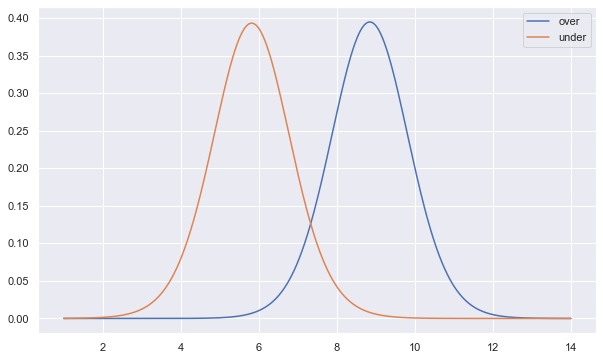

In [26]:
x = np.linspace(1, 14, int(14/0.01+1))
s_p2 = ((var_medv_over_6**2*(n1-1)) + (var_medv_under_6**2*(n2-1))) / (n1 + n2 - 2)
t_test = (mean_medv_over_6 - mean_medv_under_6) / (np.sqrt(s_p2)*np.sqrt((1/n1)+(1/n2)))
p_value =  2 * stats.t.cdf(np.abs(t_test), n1+n2-2)
print(t_test, p_value)
plt.plot(x, stats.t.pdf(x, mean_medv_over_6, std_medv_over_6), label='over')
plt.plot(x, stats.t.pdf(x, mean_medv_under_6, std_medv_under_6), label='under')
# plt.plot(x, y, label='y')
plt.legend()
plt.show()

### 9. Calculate test statistic
The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

$$
t = {(\bar x_1 - \bar x_2) - \Delta_0 \over s_p \sqrt{{1\over n_1} + {1\over n_2}}}
$$

### 9. Calculate test statistic
The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

$$
t = {\bar x_1 - \bar x_2 \over s_{err}}
= {\bar x_1 - \bar x_2 \over \sqrt{{s_1^2 \over n_1 } + {s_2^2 \over n_2}}}
$$

In [27]:
t_stat = (mean_medv_over_6 - mean_medv_under_6) / \
        (np.sqrt((std_medv_over_6**2 / n1) + (std_medv_under_6**2 / n2)))
print('t-Statistic = %.4f' % t_stat)

t-Statistic = 6.4663


### 10. Calculate Degree of Freedom
The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [28]:
df = 2 * (n1 + n2) - 2
print('Degree of Freedom = %d' % df)

Degree of Freedom = 398


### 11. Find the p-value
Now we can compute the probability of the above *t*-statistic from the cumulative density function:
- `stats.t.cdf`
- `p_value = 1 - cdf(t)`

In [29]:
p_value = 2 * stats.t.cdf(abs(t_stat), df=df)
print('t = %f' % t_stat)
print('p = %f' % p_value)

t = 6.466322
p = 2.000000


In [25]:
def add_tick(t, tl):
    done = False
    lv = list(plt.xticks()[0])
    ll = list(plt.xticks()[1])
    for i, x in enumerate(plt.xticks()[0]):
        if (t < x) and (not done):
            lv.insert(i, t)
            ll.insert(i, tl % t)
            done = True
        else:
            ll[i] = lv[i] if ll[i].get_text() == '' else ll[i]
    ll[i+1] = lv[i+1]
    return (lv, ll)

In [26]:
int(abs(3.5 - t_stat) / 0.01 + 1)

297

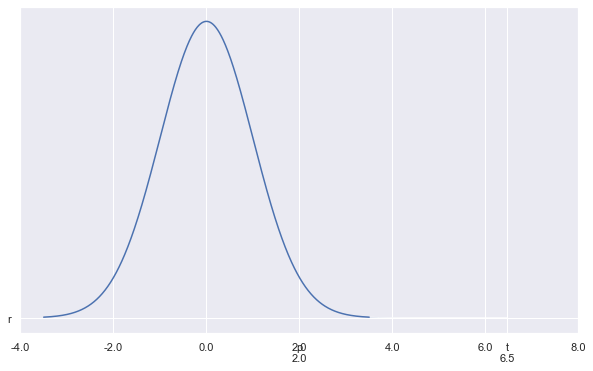

In [27]:
# plot a `t` distribution
x = np.linspace(-3.5, 3.5, int(7 / 0.01 + 1))
y = stats.t.pdf(x, df)
plt.plot(x, y, 'b')

# plot the area of interest
x_q = np.linspace(t_stat, 3.5, int(abs(3.5 - t_stat) / 0.01 + 1))
y_q = stats.t.pdf(x_q, df)

plt.fill_between(x_q, y_q, 'r', hatch='/', alpha=0.7)
l = add_tick(t_stat, 't\n%.1f')
plt.xticks(l[0], l[1])
l = add_tick(p_value, 'p\n%.1f')
plt.xticks(l[0], l[1])
plt.show()

0.5499999999999994 -0.5499999999999994
[2, 4, 6]
['2.0', '4.0', '6.0']


(-0.6049999999999993, 0.6049999999999993)

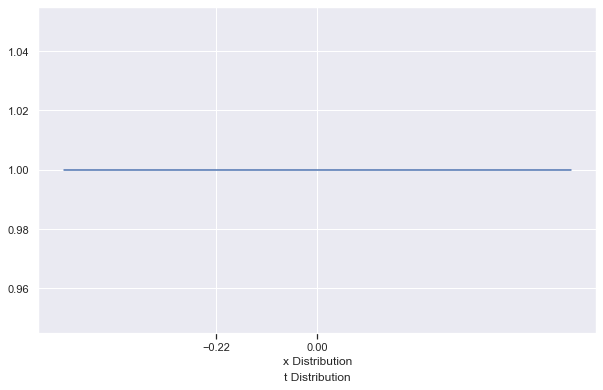

In [39]:
diff = mean_medv_over_6 - mean_medv_under_6
x_min = -2.5 * diff
x_max = 2.5 * diff
print(x_min, x_max)
x = np.linspace(x_min, x_max, 100)
# Plot the data
ax1 = plt.subplot(1, 1, 1)
ax1.plot(x, np.ones(100))
ax1.set_xlabel('x Distribution')
x_ticks = [diff, 0] if diff < 0 else [0, diff]
ax1.set_xticks(x_ticks)

# Set second x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
x_to_t = lambda t: t # convert function: from Kelvin to Degree Celsius
newpos = [x_to_t(i) for i in [2, 4, 6]]   # position of the xticklabels in the old x-axis
print(newpos)
ax2.set_xticks(newpos)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
newlabel = ['%.1f' % i for i in newpos] # labels of the xticklabels: the position in the new x-axis
print(newlabel)
ax2.set_xticklabels(newlabel)
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom

ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('t Distribution')
ax2.set_xlim(ax1.get_xlim())

True


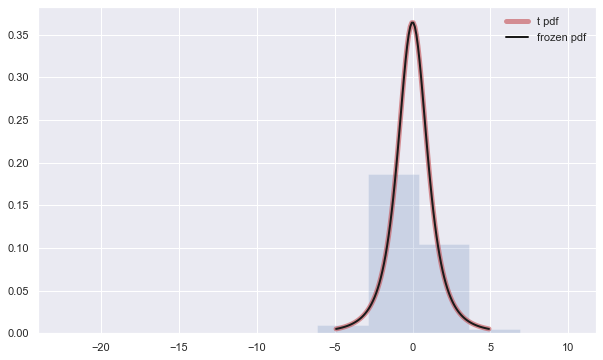

In [40]:
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:
df = 2.74
mean, var, skew, kurt = stats.t.stats(df, moments='mvsk')

# Display the probability density function (``pdf``):
x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), 100)
ax.plot(x, stats.t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')

# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns a "frozen"
# RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen ``pdf``:
rv = stats.t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of ``cdf`` and ``ppf``:

vals = stats.t.ppf([0.001, 0.5, 0.999], df)
print(np.allclose([0.001, 0.5, 0.999], stats.t.cdf(vals, df)))

# Generate random numbers:

r = stats.t.rvs(df, size=1000)

# And compare the histogram:

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## Interpret results
### 12. Write a Function to Test Significance of `p_value`
Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [41]:
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': 'Large House prices are the same as Small House prices. (LH - SH = 0)',
    'H1': 'Large House prices are higher the Small House prices. (LH - SH > 0)'
}

In [42]:
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        str_result = 'We reject the null hypothesis in favour of the alternative.'
        str_result += '\n%s' % null_hypothesis['H1']
    elif p_value > alpha:
        str_result = 'We fail to reject the null hypothesis.'
        str_result += '\n%s' % null_hypothesis['H0']
    else:
        str_result = 'Our test is inconclusive.'
    return str_result

In [43]:
print('t-stat  = %f' % t_stat)
print('p-value = %f' % p_value)
print(check_sig(p_value, alpha))

t-stat  = 6.466322
p-value = 2.000000
We fail to reject the null hypothesis.
Large House prices are the same as Small House prices. (LH - SH = 0)


### 13. [Bonus] Write a function to calculate t, p_value from two samples
Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

#### Calculate Standard Error
- Population Variances Known
    - Where the population variances $\sigma_1^2$ and $\sigma_2^2$ are known:
        - $S_{err} = \sqrt{{\sigma_1^2 \over n_1 } + {\sigma_2^2 \over n_2}}$
        - $z = {(\bar x_1 - \bar x_2) - \Delta_0 \over \sqrt{{\sigma_1^2\over n_1} + {\sigma_2^2\over n_2}}}$
- Population Variances Unknown but assume equal
    - Where the sample variances $s_1^2$ and $s_2^2$ are assumed:
        - $s_p^2 = {(n_1 - 1) s_1^2 + (n_2 - 1) s_ 2^2 \over n_1 + n_2 - 2}$
        - $S_{err} = S_p \sqrt{{1 \over n_1 } + {1 \over n_2}}$
        - $t = {(\bar x_1 - \bar x_2) - \Delta_0 \over s_p \sqrt{{1\over n_1} + {1\over n_2}}}$
- Population Variances Unknown but assume not equal
    - Where the population variances $\sigma_1^2$ and $\sigma_2^2$ are unknown and not assumed equal:
        - $S_{err} = \sqrt{{s_1^2 \over n_1 } + {s_2^2 \over n_2}}$
        - $t = {(\bar x_1 - \bar x_2) - \Delta_0 \over \sqrt{{s_1^2\over n_1} + {s_2^2\over n_2}}}$


In [33]:
def t_test_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    n = len(a)
    print(n)

    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    print(var_a, var_b)
    # Calculate Standard deviation
    std_a = a.std()
    std_b = b.std()
    print(std_a, std_b)

    # Calculate Standard Deviation
#     s_p = np.sqrt((var_a**2 + var_b**2) / 2)
    s_p = ((n - 1)*var_a**2 + (n - 1)*var_b**2) / (n + n - 2)
    print(s_p)

    # Calculate t-stat
    mean_a = a.mean()
    mean_b = b.mean()
    t = (mean_a - mean_b) / (s_p * np.sqrt((std_a / n) + (std_b / n)))  # t-statistic
    print(t)

    # Calculate degree of freedom
    df = 2 * n - 2

    # Calculate p-value
    p = stats.t.pdf(np.abs(t), df=df)  # p-value after comparison with the t
    # Two-tail
    p = p * 2

    return t, p, check_sig(p, alpha)

In [34]:
t1, p1, sig = t_test_ind(medv_over_6, medv_under_6, alpha)
print('t-stat  = %f' % t1)
print('p-value = %f' % p1)
print(sig)

100
78.21840303030305 33.83687272727272
8.84411685982852 5.816947028061431
3631.526264286287
0.004922679032129206
t-stat  = 0.004923
p-value = 0.796868
We fail to reject the null hypothesis.
Large House prices are the same as Small House prices. (LH - SH = 0)


### 14. Calculate the T-test for the means of *two independent* samples of scores
Using the following method of stats calculate the T-test for the means of two independent samples of scores.
- `stats.ttest_ind`

In [35]:
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print('t-stat  = %f' % t2)
print('p-value = %f' % p2)
print(check_sig(p2, alpha))

t-stat  = 6.466322
p-value = 0.000000
We reject the null hypothesis in favour of the alternative.
Large House prices are higher the Small House prices. (LH - SH > 0)


In [36]:
# mean
mean_medv_over_6 = 3.45
print('Mean of over 6  = %.4f' % mean_medv_over_6)
mean_medv_under_6 = 3.67
print('Mean of under 6 = %.4f' % mean_medv_under_6)
# standard deviation
std_medv_over_6 = medv_over_6.std()
print('Standard deviation of over 6  = %.4f' % std_medv_over_6)
std_medv_under_6 = medv_under_6.std()
print('Standard deviation of under 6 = %.4f' % std_medv_under_6)

Mean of over 6  = 3.4500
Mean of under 6 = 3.6700
Standard deviation of over 6  = 8.8441
Standard deviation of under 6 = 5.8169
